In [2]:
import pandas as pd
import numpy as np

In [3]:
base = pd.read_csv('electricity-normalized.csv')

In [4]:
base.head()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.0,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,UP
1,0.0,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,UP
2,0.0,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,UP
3,0.0,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,UP
4,0.0,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,DOWN


In [5]:
base.isnull().sum()

date         0
day          0
period       0
nswprice     0
nswdemand    0
vicprice     0
vicdemand    0
transfer     0
class        0
dtype: int64

Não tem nenhum valor faltante. Podemos então prosseguir sem fazer o tratamento para esta situação.

In [6]:
x = base.iloc[:, 0:8].values
y = base.iloc[:, 8].values

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
labelencoder_y = LabelEncoder()

In [9]:
y = labelencoder_y.fit_transform(base.iloc[:, 8].values)

In [10]:
y[:50]

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

In [11]:
"""
UP --> 1
DOWN --> 0
""";

In [12]:
from sklearn.naive_bayes import GaussianNB

In [13]:
classificador = GaussianNB()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=0)

In [16]:
classificador.fit(x_train, y_train)

GaussianNB()

In [17]:
previsoes = classificador.predict(x_test)

In [18]:
x_train

array([[8.94606e-01, 1.00000e+00, 9.78723e-01, ..., 3.47900e-03,
        4.08079e-01, 6.35088e-01],
       [2.72110e-02, 5.00000e+00, 9.36170e-01, ..., 3.46700e-03,
        4.22915e-01, 4.14912e-01],
       [2.71230e-02, 3.00000e+00, 6.17021e-01, ..., 3.46700e-03,
        4.22915e-01, 4.14912e-01],
       ...,
       [9.07172e-01, 7.00000e+00, 7.87234e-01, ..., 6.93600e-03,
        5.24081e-01, 4.43421e-01],
       [9.08057e-01, 6.00000e+00, 6.59574e-01, ..., 3.22800e-03,
        4.93786e-01, 3.26316e-01],
       [8.62800e-03, 2.00000e+00, 9.36170e-01, ..., 3.46700e-03,
        4.22915e-01, 4.14912e-01]])

In [19]:
y_train[:50]

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1])

In [20]:
y_test[:50]

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0])

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

In [22]:
precisao = accuracy_score(y_test, previsoes)

In [23]:
print('Precisão do algorítmo: {:.1f}%'.format(precisao*100))

Precisão do algorítmo: 74.7%


In [24]:
matriz_confusao = confusion_matrix(y_test, previsoes)

In [25]:
matriz_confusao

array([[11675,  1362],
       [ 4378,  5241]], dtype=int64)

In [26]:
print(f'Down: {classificador.class_count_[0]}\nUp {classificador.class_count_[1]}')

Down: 13038.0
Up 9618.0


In [27]:
print(list('{:.1f}%'.format(cl*100) for cl in classificador.class_prior_))

['57.5%', '42.5%']


In [28]:
import matplotlib.pyplot as plt

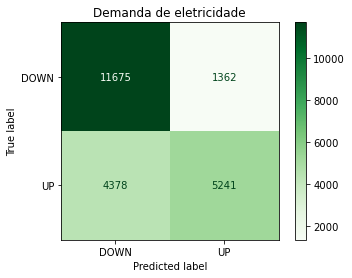

In [29]:
matriz = plot_confusion_matrix(classificador, x_test, y_test, cmap=plt.cm.Greens, 
display_labels=['DOWN', 'UP'])
plt.title('Demanda de eletricidade');

### Cálculo realizado para calcular a precisão do algoritmo:
(Esse cálculo é feito na utilização da função accuracy_score() do sklearn)

In [30]:
tp = 16916 # true positive
fp = 4378 + 1362 # false positive

In [31]:
eficacia = tp/(tp+fp)

In [32]:
print('Precisão: {:.1f}%'.format(eficacia*100))

Precisão: 74.7%


Perceba que o resultado foi exatamente o mesmo de quando se utilizou a função

In [33]:
from sklearn.metrics import matthews_corrcoef, average_precision_score

In [34]:
precisaoMatthews = matthews_corrcoef(y_test, previsoes)

In [45]:
print('Precisão do Matthews Correlation Coefficient: {:.1f}'.format(precisaoMatthews))

Precisão do Matthews Correlation Coefficient: 0.5


In [36]:
precisaoAvarage = average_precision_score(y_test, previsoes)

In [37]:
'Precisão do Avarage Precision Score: {:.1f}%'.format(precisaoAvarage*100)

'Precisão do Avarage Precision Score: 62.6%'

In [38]:
from sklearn.metrics import plot_precision_recall_curve

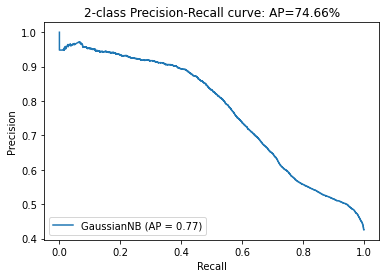

In [39]:
disp = plot_precision_recall_curve(classificador, x_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={:.2f}%'.format(precisao*100));

In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y_test, previsoes))

precision    recall  f1-score   support

           0       0.73      0.90      0.80     13037
           1       0.79      0.54      0.65      9619

    accuracy                           0.75     22656
   macro avg       0.76      0.72      0.72     22656
weighted avg       0.76      0.75      0.74     22656



In [42]:
from sklearn.metrics import precision_score

In [43]:
precisaoPrecisionScore = precision_score(y_test, previsoes)

In [44]:
print('Precisão do Precision Score: {:.1f}%'.format(precisaoPrecisionScore*100))

Precisão do Precision Score: 79.4%
